# SCPY402 Signal and Image Processing Final Project

## General Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings

#### Warning Ignore

In [2]:
warnings.filterwarnings('ignore')

## Machine Learning Libraries

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf

## Part 1: Cleaning Data

### Raw Dataset

In [4]:
df = pd.read_csv("/Users/stampveeraphat/Downloads/passenger.csv")
df

,_id,รูปแบบการเดินทาง,วัตถุประสงค์,สาธารณะ/ส่วนบุคคล,หน่วยงาน,ยานพาหนะ/ท่า,วันที่,หน่วย,ปริมาณ
0,1,ทางถนน,การเดินทางระหว่างจังหวัด,สาธารณะ,บขส.,รถ ขบส. และ รถร่วม,2020-01-01T00:00:00,คน,233330.0
1,2,ทางถนน,การเดินทางระหว่างจังหวัด,ส่วนบุคคล,ทล.,รถยนต์เฉพาะ 4 ล้อ (10 จุดสำรวจ),2020-01-01T00:00:00,คัน,977347.0
2,3,ทางถนน,การเดินทางระหว่างจังหวัด,ส่วนบุคคล,ทล.,รถยนต์ทุกประเภท (10 จุดสำรวจ),2020-01-01T00:00:00,คัน,1072314.0
3,4,ทางถนน,การเดินทางระหว่างจังหวัด,ส่วนบุคคล,กทพ.,รถยนต์เฉพาะ 4 ล้อ (ทางด่วน),2020-01-01T00:00:00,คัน,1333059.0
4,5,ทางถนน,การเดินทางระหว่างจังหวัด,ส่วนบุคคล,กทพ.,รถยนต์ทุกประเภท (ทางด่วน),2020-01-01T00:00:00,คัน,1353179.0
...,...,...,...,...,...,...,...,...,...
66190,66191,ทางอากาศ,การเดินทางระหว่างประเทศ,สาธารณะ,ทอท.,ท่าอากาศยานดอนเมือง ขาออกประเทศ,2024-10-17T00:00:00,คน,16269.0
66191,66192,ทางอากาศ,การเดินทางระหว่างประเทศ,สาธารณะ,ทอท.,ท่าอากาศยานอื่น ๆ ของ ทอท. ขาเข้าประเทศ,2024-10-17T00:00:00,คน,16393.0
66192,66193,ทางอากาศ,การเดินทางระหว่างประเทศ,สาธารณะ,ทอท.,ท่าอากาศยานอื่น ๆ ของ ทอท. ขาออกประเทศ,2024-10-17T00:00:00,คน,13681.0
66193,66194,ทางอากาศ,การเดินทางระหว่างประเทศ,สาธารณะ,ทย.,ท่าอากาศยานภูมิภาค ขาเข้าประเทศ,2024-10-17T00:00:00,คน,0.0


### Cleaning Part

This part is the cleaning part in this work. We filtered data with MRT Blue Line and remove time 00:00:00 after the date. 

In [5]:
rdf = df.loc[df['ยานพาหนะ/ท่า']=='รถไฟฟ้าสายสีน้ำเงิน']
rdf['วันที่'] = rdf['วันที่'].str.replace('T00:00:00', '')
rdf['วันที่'] = pd.to_datetime(rdf['วันที่'], format='%Y-%m-%d')
filtered_rdf = rdf.loc[rdf['วันที่'].dt.weekday <= 4]
#filtered_rdf = filtered_rdf.loc[filtered_rdf['วันที่']>='2020-09-01']
filtered_rdf.reset_index(drop=True, inplace=True)
filtered_rdf

,_id,รูปแบบการเดินทาง,วัตถุประสงค์,สาธารณะ/ส่วนบุคคล,หน่วยงาน,ยานพาหนะ/ท่า,วันที่,หน่วย,ปริมาณ
0,12,ทางราง,การเดินทางภายในจังหวัด/กรุงเทพ,สาธารณะ,รฟม.,รถไฟฟ้าสายสีน้ำเงิน,2020-01-01,คน,236053.0
1,39,ทางราง,การเดินทางภายในจังหวัด/กรุงเทพ,สาธารณะ,รฟม.,รถไฟฟ้าสายสีน้ำเงิน,2020-01-02,คน,341059.0
2,66,ทางราง,การเดินทางภายในจังหวัด/กรุงเทพ,สาธารณะ,รฟม.,รถไฟฟ้าสายสีน้ำเงิน,2020-01-03,คน,373005.0
3,147,ทางราง,การเดินทางภายในจังหวัด/กรุงเทพ,สาธารณะ,รฟม.,รถไฟฟ้าสายสีน้ำเงิน,2020-01-06,คน,408509.0
4,174,ทางราง,การเดินทางภายในจังหวัด/กรุงเทพ,สาธารณะ,รฟม.,รถไฟฟ้าสายสีน้ำเงิน,2020-01-07,คน,418431.0
...,...,...,...,...,...,...,...,...,...
1246,65954,ทางราง,การเดินทางภายในจังหวัด/กรุงเทพ,สาธารณะ,รฟม.,รถไฟฟ้าสายสีน้ำเงิน,2024-12-10,คน,372564.0
1247,66040,ทางราง,การเดินทางภายในจังหวัด/กรุงเทพ,สาธารณะ,รฟม.,รถไฟฟ้าสายสีน้ำเงิน,2024-10-14,คน,271099.0
1248,66083,ทางราง,การเดินทางภายในจังหวัด/กรุงเทพ,สาธารณะ,รฟม.,รถไฟฟ้าสายสีน้ำเงิน,2024-10-15,คน,513025.0
1249,66126,ทางราง,การเดินทางภายในจังหวัด/กรุงเทพ,สาธารณะ,รฟม.,รถไฟฟ้าสายสีน้ำเงิน,2024-10-16,คน,502914.0


In [338]:
date = filtered_rdf.loc[filtered_rdf['วันที่'].index>1000]

Text(0, 0.5, 'Number of Passengers')

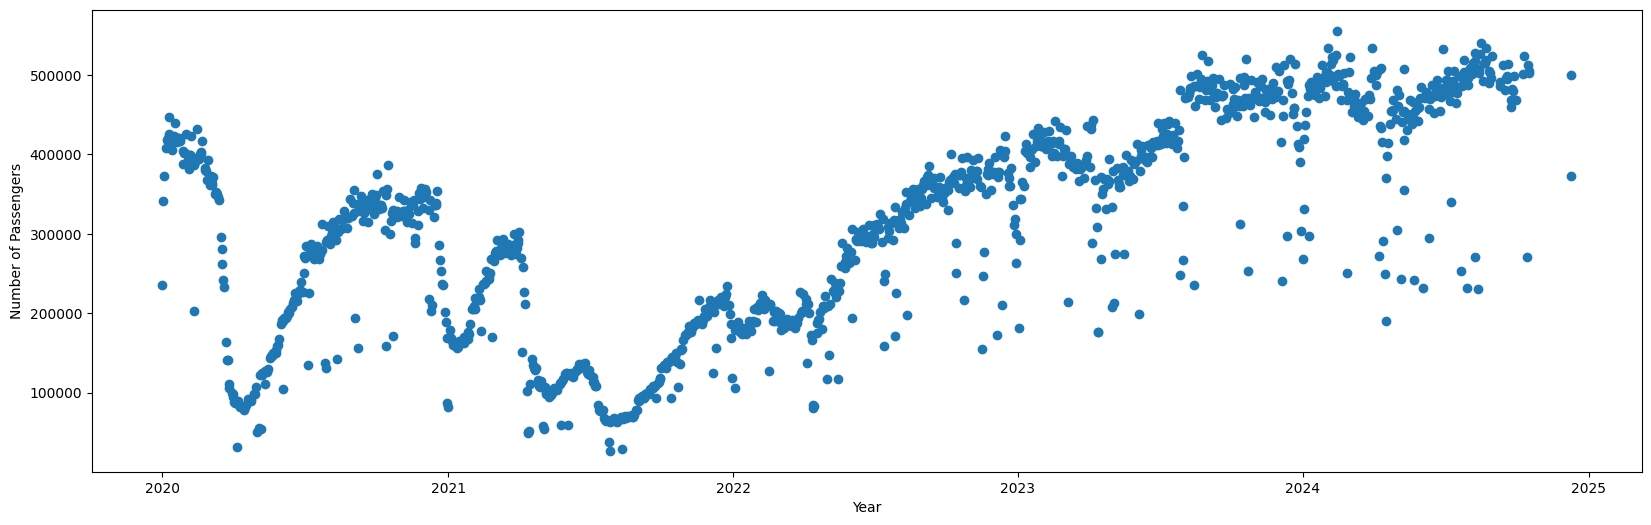

In [10]:
plt.figure(figsize=(20,6))
plt.scatter(filtered_rdf['วันที่'],filtered_rdf['ปริมาณ'])
plt.xlabel("Year")
plt.ylabel("Number of Passengers")

## Part 2 LSTM

In [ ]:
passengers = filtered_rdf['ปริมาณ'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(passengers)

In [ ]:
def create_sequences(filtered_rdf, seq_length, steps_ahead):
    x, y = [], []
    for i in range(len(filtered_rdf) - seq_length - steps_ahead + 1):
        x.append(filtered_rdf[i:i + seq_length, 0])
        y.append(filtered_rdf[i + seq_length:i + seq_length + steps_ahead, 0])
    return np.array(x), np.array(y)

sequence_length = 1  
steps_ahead = 251      
x, y = create_sequences(scaled_data, sequence_length, steps_ahead)
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

In [ ]:
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [343]:
len(y_train)

800

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(5000, return_sequences=True, input_shape=(x.shape[1], 1)),
    tf.keras.layers.LSTM(1000),
    tf.keras.layers.Dense(steps_ahead)
])

2024-12-08 20:26:12.315435: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-08 20:26:12.319155: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-08 20:26:12.319958: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10


2024-12-08 20:27:15.143469: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-08 20:27:15.144858: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-08 20:27:15.145863: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

25/25 [==============================] - ETA: 0s - loss: 0.0972 - mean_absolute_error: 0.2495

2024-12-08 20:28:07.598713: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-08 20:28:07.599585: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-08 20:28:07.600630: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

25/25 [==============================] - 53s 2s/step - loss: 0.0972 - mean_absolute_error: 0.2495 - val_loss: 0.1405 - val_mean_absolute_error: 0.3576
Epoch 2/10
25/25 [==============================] - 50s 2s/step - loss: 0.0428 - mean_absolute_error: 0.1738 - val_loss: 0.0737 - val_mean_absolute_error: 0.2571
Epoch 3/10
25/25 [==============================] - 51s 2s/step - loss: 0.0411 - mean_absolute_error: 0.1710 - val_loss: 0.0833 - val_mean_absolute_error: 0.2742
Epoch 4/10
25/25 [==============================] - 52s 2s/step - loss: 0.0413 - mean_absolute_error: 0.1716 - val_loss: 0.0844 - val_mean_absolute_error: 0.2752
Epoch 5/10
25/25 [==============================] - 52s 2s/step - loss: 0.0414 - mean_absolute_error: 0.1709 - val_loss: 0.0805 - val_mean_absolute_error: 0.2697
Epoch 6/10
25/25 [==============================] - 53s 2s/step - loss: 0.0414 - mean_absolute_error: 0.1716 - val_loss: 0.0814 - val_mean_absolute_error: 0.2704
Epoch 7/10
25/25 [=====================

In [ ]:
loss = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")

7/7 [==============================] - 0s 61ms/step - loss: 0.0757 - mean_absolute_error: 0.2559
Test Loss: [0.07570552080869675, 0.25587910413742065]


In [ ]:
last_sequence = scaled_data[-sequence_length:]
last_sequence = last_sequence.reshape(1, sequence_length, 1)

future_forecast = model.predict(last_sequence)
future_forecast = scaler.inverse_transform(future_forecast.reshape(-1, 1))

2024-12-08 20:36:00.480224: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-08 20:36:00.483487: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-08 20:36:00.484629: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 1s 595ms/step


In [356]:
np.mean(future_forecast)

353674.66

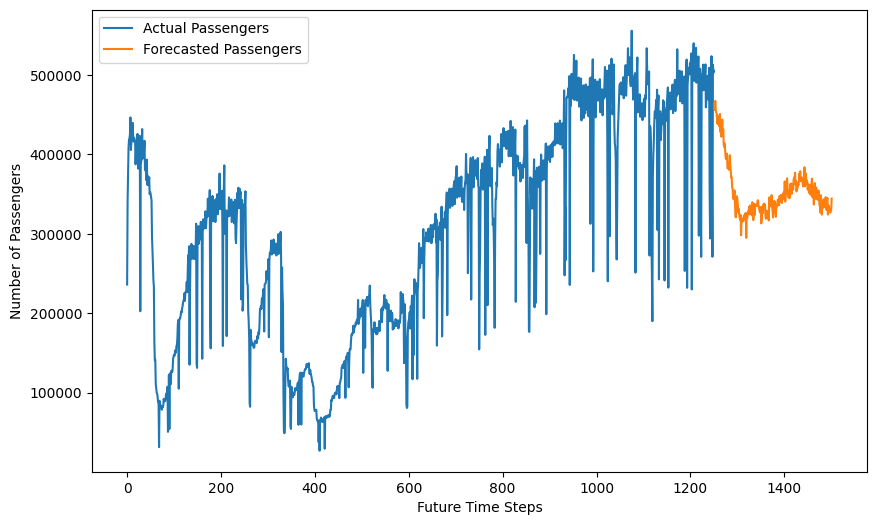

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(filtered_rdf['ปริมาณ'], label='Actual Passengers')
plt.plot(range(1251, steps_ahead + 1251), future_forecast, label='Forecasted Passengers')
plt.xlabel('Future Time Steps')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [ ]:
predicted = model.predict()
predicted1 = scaler.inverse_transform(predicted.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

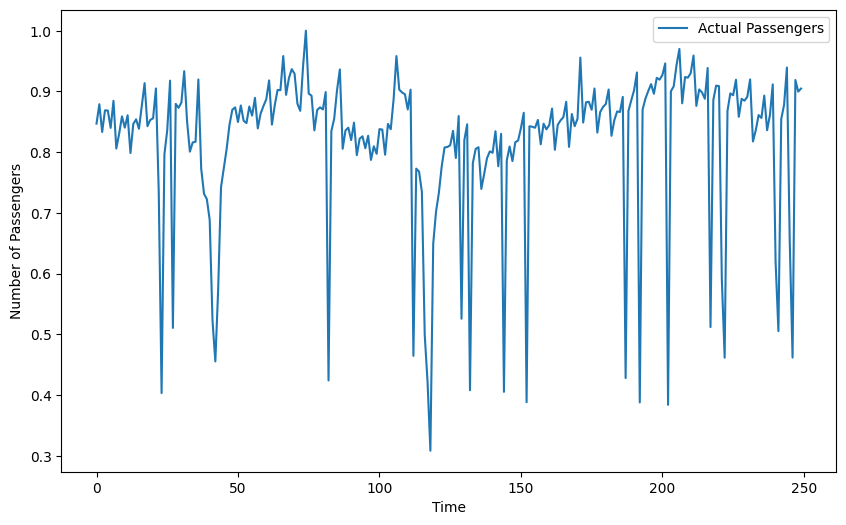

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Passengers')
#plt.plot(predicted1, label='Predicted Passengers')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.show()

In [31]:
np.sqrt(mean_squared_error(y_test,predicted))

0.14819635441601553

## Part 3 XGBoost

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [149]:
x2 = filtered_rdf['วันที่'].index
y2 = filtered_rdf['ปริมาณ']

In [150]:
x2 = x2.values.reshape(-1,1)
y2 = y2.values.reshape(-1,1)

In [151]:
X_train, X_test, Y_train, Y_test = train_test_split(x2, y2, test_size=0.2)

In [ ]:
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror', 
    n_estimators=100, 
    learning_rate=0.2, 
    max_depth=10,
    enable_categorical = True,
    random_state=42
)

In [ ]:
xgb_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
Y_pred = xgb_model.predict(X_test)

In [138]:
len(Y_pred)

251

In [ ]:
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {mse}")

Root Mean Squared Error: 32906361505.705708


In [156]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test,Y_pred)

147099.19612176294

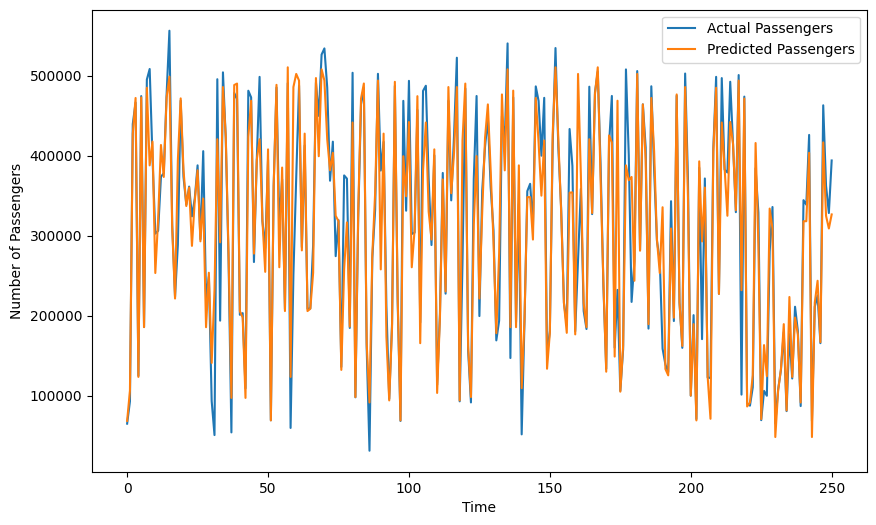

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(Y_test, label='Actual Passengers')
plt.plot(Y_pred, label='Predicted Passengers')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.show()

## Part 3 ARIMA

In [157]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
train_size = int(len(filtered_rdf) * 0.8)
train, test = filtered_rdf[:train_size], filtered_rdf[train_size:]

In [ ]:
model = ARIMA(train['ปริมาณ'], order=(2,1,2))
model_fit = model.fit()

In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 ปริมาณ   No. Observations:                 1000
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -12029.775
Date:                Sun, 08 Dec 2024   AIC                          24069.551
Time:                        16:41:05   BIC                          24094.084
Sample:                             0   HQIC                         24078.876
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7515      0.139     -5.407      0.000      -1.024      -0.479
ar.L2          0.1263      0.050      2.527      0.012       0.028       0.224
ma.L1          0.2214      0.139      1.597      0.1

In [ ]:
forecast_result = model_fit.get_forecast(steps=len(test))
predicted_values = forecast_result.predicted_mean
confidence_intervals = forecast_result.conf_int()

In [ ]:
mse = mean_squared_error(test['ปริมาณ'], predicted_values)
mae = mean_absolute_error(test['ปริมาณ'],predicted_values)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 42528.697139198994
Root Mean Squared Error: 67163.03090284811


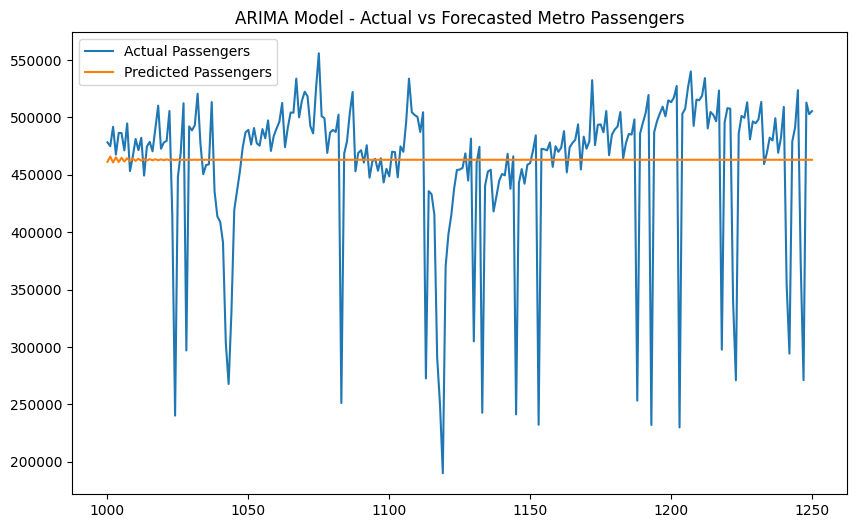

In [ ]:
plt.figure(figsize=(10, 6))
#plt.plot(train['ปริมาณ'], label='Train')
plt.plot(test['ปริมาณ'], label='Actual Passengers')
plt.plot(test.index, predicted_values, label='Predicted Passengers')
plt.legend()
plt.title('ARIMA Model - Actual vs Forecasted Metro Passengers')
plt.show()